### Question 1

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,RocCurveDisplay, plot_roc_curve, auc, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore") # To ignore warning for boston dataset

In [2]:
boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [3]:
boston_df.shape

(506, 14)

In [4]:
X=68
x=.68
datarowsSeries = [pd.Series([0.069+X,10+X,2.3+x,0+x,0.53+x,6.5+x,65.2+x,4.01+x,1+x,290+X,15+X,395+X,4.9+x,24+X], 
                            index=boston_df.columns ), 
                  pd.Series([0.069+X,11+X,2.3+x,0+x,0.6+x,6.6+x,65.3+x,4.2+x,1+x,290+X,15+X,395+X,4.9+x,24+X], 
                            index=boston_df.columns ),
                  pd.Series([0.069+X,10+X,2.3+x,0+x,0.53+x,6.5+x,65.2+x,4.01+x,1+x,290+X,15+X,395+X,4.9+x,24+X], 
                            index=boston_df.columns ), 
                  pd.Series([0.069+X,11+X,2.3+x,0+x,0.6+x,6.6+x,65.3+x,4.2+x,1+x,290+X,15+X,395+X,4.9+x,24+X], 
                            index=boston_df.columns )]
# new_data = boston_df.append(datarowsSeries , ignore_index=True)
# converting series into dataframe
datarowsSeries = pd.DataFrame(datarowsSeries)

new_data = pd.concat([boston_df, datarowsSeries], axis=0, ignore_index=True)

In [5]:
new_data.shape

(510, 14)

In [6]:
new_data.tail()

CRIM    ZN  INDUS  CHAS    NOX    RM    AGE    DIS   RAD    TAX  \
505   0.04741   0.0  11.93  0.00  0.573  6.03  80.80  2.505  1.00  273.0   
506  68.06900  78.0   2.98  0.68  1.210  7.18  65.88  4.690  1.68  358.0   
507  68.06900  79.0   2.98  0.68  1.280  7.28  65.98  4.880  1.68  358.0   
508  68.06900  78.0   2.98  0.68  1.210  7.18  65.88  4.690  1.68  358.0   
509  68.06900  79.0   2.98  0.68  1.280  7.28  65.98  4.880  1.68  358.0   

     PTRATIO      B  LSTAT  PRICE  
505     21.0  396.9   7.88   11.9  
506     83.0  463.0   5.58   92.0  
507     83.0  463.0   5.58   92.0  
508     83.0  463.0   5.58   92.0  
509     83.0  463.0   5.58   92.0

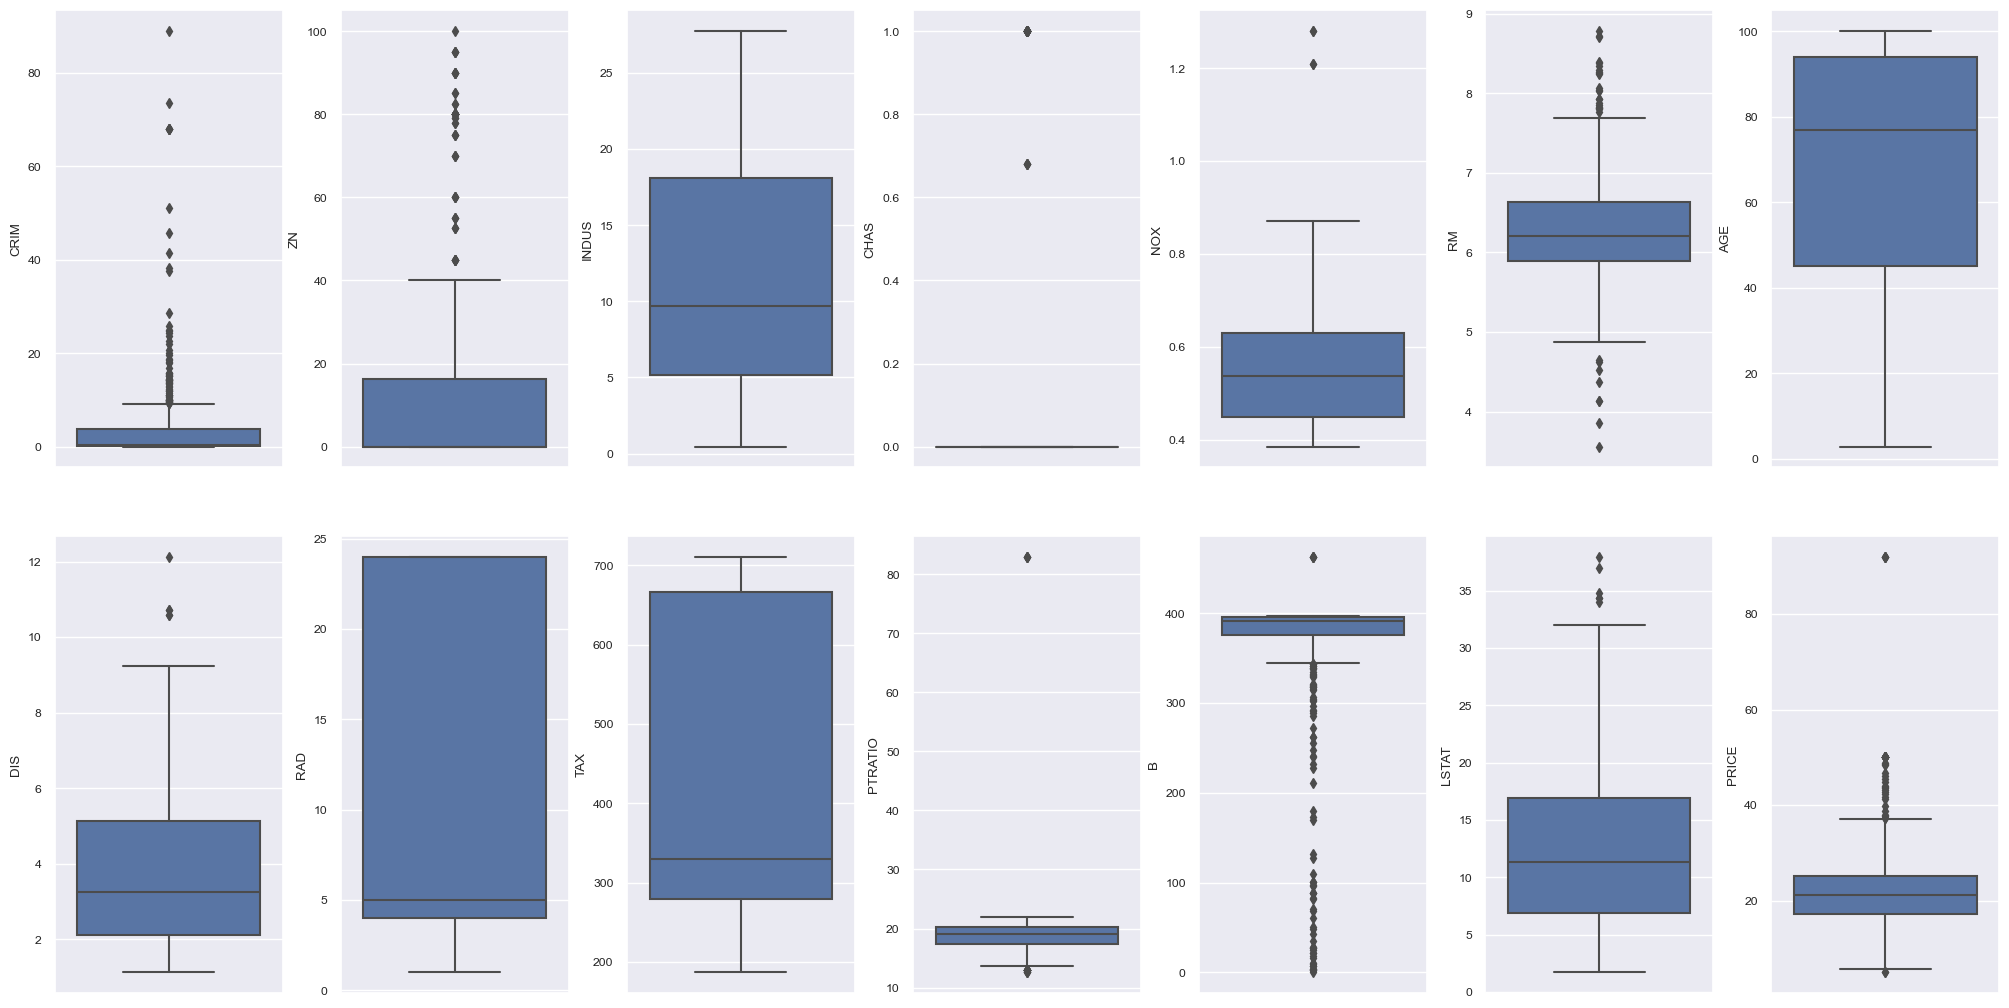

In [7]:
# Boxplot
sns.set(rc={'figure.figsize':(10,6)}, font_scale=0.8)

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in new_data.items():
    sns.boxplot(y=k, data=new_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

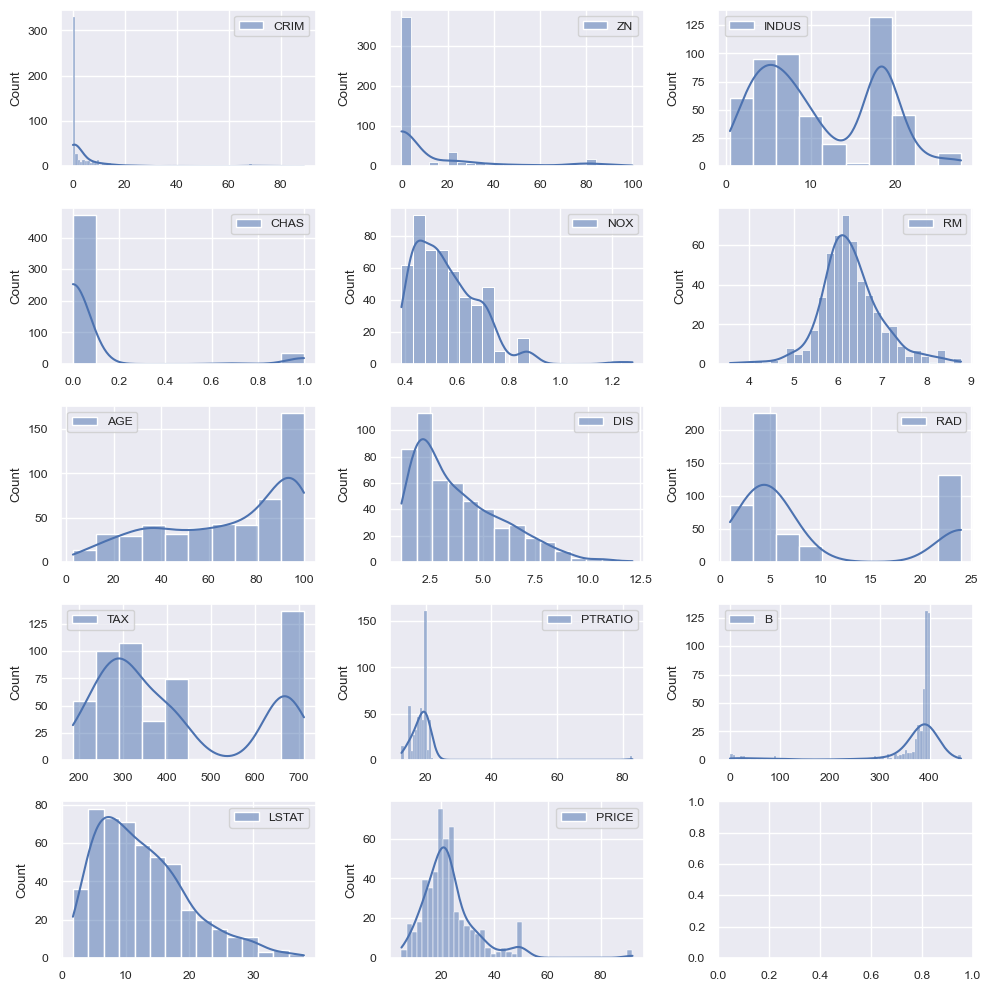

In [8]:
# Histogram
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(10, 10))
index = 0
axs = axs.flatten()
for j in new_data.items():
    sns.histplot(j, ax=axs[index],kde=True, color='#DAF7A6')
    index += 1
plt.tight_layout()

In [9]:
# Bar Chart
# Categorize as Low = 1 and High = 2
df_boston = new_data 
df_boston['PRICE'] = np.where((df_boston['PRICE']<=20),1,2)
df_boston['PRICE'] = df_boston['PRICE'].map({1:'Low', 2:'High'})

In [10]:
df_boston['PRICE'].value_counts()

High    295
Low     215
Name: PRICE, dtype: int64

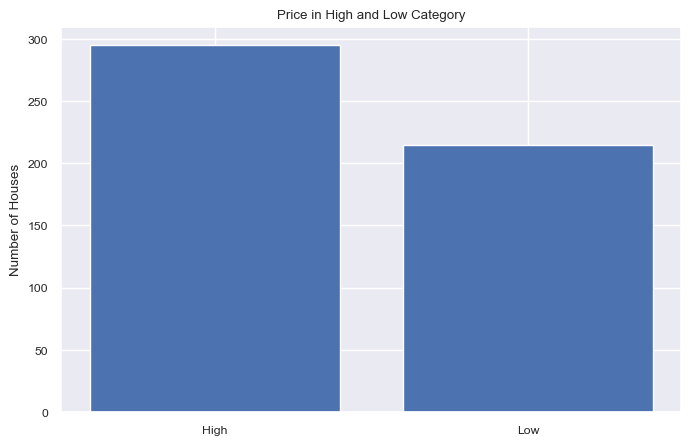

In [11]:
# Bar diagram
objects = ('High', 'Low')
x_pos = np.arange(len(objects))
status_fre=[295, 215] # get the frequency value from df.status.value_counts()
plt.figure(figsize=(8,5))
plt.bar(x_pos, status_fre)
plt.xticks(x_pos, objects)
plt.ylabel('Number of Houses')
plt.title('Price in High and Low Category')
plt.show()

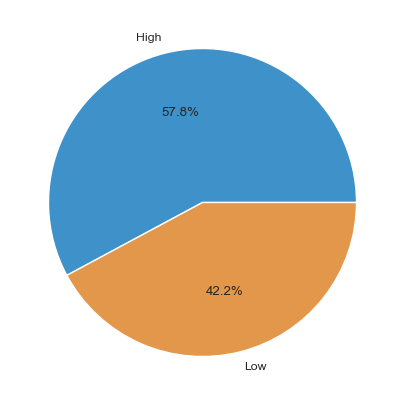

In [12]:
# Pie Chart
frequency=[295, 215]
plt.figure(figsize=(8,5))
plt.pie(frequency, labels=['High', 'Low'], colors=['#3e92c9','#e3974b'],  autopct='%.1f%%')
plt.show()

### Question 2

In [13]:
df_boston.describe().T

count        mean         std        min         25%        50%  \
CRIM     510.0    4.119057   10.285790    0.00632    0.082268    0.26266   
ZN       510.0   11.890196   23.975137    0.00000    0.000000    0.00000   
INDUS    510.0   11.072804    6.871196    0.46000    5.130000    9.69000   
CHAS     510.0    0.073961    0.258680    0.00000    0.000000    0.00000   
NOX      510.0    0.560109    0.130565    0.38500    0.449000    0.53800   
RM       510.0    6.292049    0.704826    3.56100    5.887250    6.21000   
AGE      510.0   68.554157   28.039012    2.90000   45.175000   76.95000   
DIS      510.0    3.802807    2.099258    1.12960    2.101425    3.23925   
RAD      510.0    9.487686    8.700770    1.00000    4.000000    5.00000   
TAX      510.0  407.843137  167.932180  187.00000  279.250000  330.00000   
PTRATIO  510.0   18.961765    6.093603   12.60000   17.400000   19.10000   
B        510.0  357.507961   91.418811    0.32000  375.607500  391.60000   
LSTAT    510.0   12.597588    7.140314    1.73000    6.877500   11.30000   

                75%       max  
CRIM       3.755472   88.9762  
ZN        16.250000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.629250    1.2800  
RM         6.630000    8.7800  
AGE       93.975000  100.0000  
DIS        5.118000   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   83.0000  
B        396.295000  463.0000  
LSTAT     16.930000   37.9700

In [14]:
# Correlation using spearman
df_boston.corr(method='spearman')

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.530797  0.703959  0.082651  0.825564 -0.283345  0.691616   
ZN      -0.530797  1.000000 -0.650038  0.009781 -0.591896  0.374710 -0.542275   
INDUS    0.703959 -0.650038  1.000000  0.051321  0.757764 -0.425199  0.677648   
CHAS     0.082651  0.009781  0.051321  1.000000  0.108498  0.092578  0.056378   
NOX      0.825564 -0.591896  0.757764  0.108498  1.000000 -0.284477  0.781379   
RM      -0.283345  0.374710 -0.425199  0.092578 -0.284477  1.000000 -0.278491   
AGE      0.691616 -0.542275  0.677648  0.056378  0.781379 -0.278491  1.000000   
DIS     -0.725007  0.617700 -0.757114 -0.058298 -0.857760  0.267843 -0.801804   
RAD      0.690362 -0.298222  0.466117 -0.017714  0.551473 -0.124102  0.418588   
TAX      0.722152 -0.364573  0.658992 -0.039143  0.645025 -0.268778  0.527110   
PTRATIO  0.477809 -0.409515  0.407002 -0.084652  0.405677 -0.288281  0.346508   
B       -0.328783  0.185374 -0.298434  0.006289 -0.266180  0.071858 -0.230668   
LSTAT    0.607437 -0.498639  0.642908 -0.078297  0.609604 -0.646839  0.655576   

              DIS       RAD       TAX   PTRATIO         B     LSTAT  
CRIM    -0.725007  0.690362  0.722152  0.477809 -0.328783  0.607437  
ZN       0.617700 -0.298222 -0.364573 -0.409515  0.185374 -0.498639  
INDUS   -0.757114  0.466117  0.658992  0.407002 -0.298434  0.642908  
CHAS    -0.058298 -0.017714 -0.039143 -0.084652  0.006289 -0.078297  
NOX     -0.857760  0.551473  0.645025  0.405677 -0.266180  0.609604  
RM       0.267843 -0.124102 -0.268778 -0.288281  0.071858 -0.646839  
AGE     -0.801804  0.418588  0.527110  0.346508 -0.230668  0.655576  
DIS      1.000000 -0.498755 -0.573530 -0.308136  0.256177 -0.565683  
RAD     -0.498755  1.000000  0.695232  0.288829 -0.298243  0.402332  
TAX     -0.573530  0.695232  1.000000  0.449204 -0.324158  0.529721  
PTRATIO -0.308136  0.288829  0.449204  1.000000 -0.046556  0.443604  
B        0.256177 -0.298243 -0.324158 -0.046556  1.000000 -0.221924  
LSTAT   -0.565683  0.402332  0.529721  0.443604 -0.221924  1.000000

<AxesSubplot:>

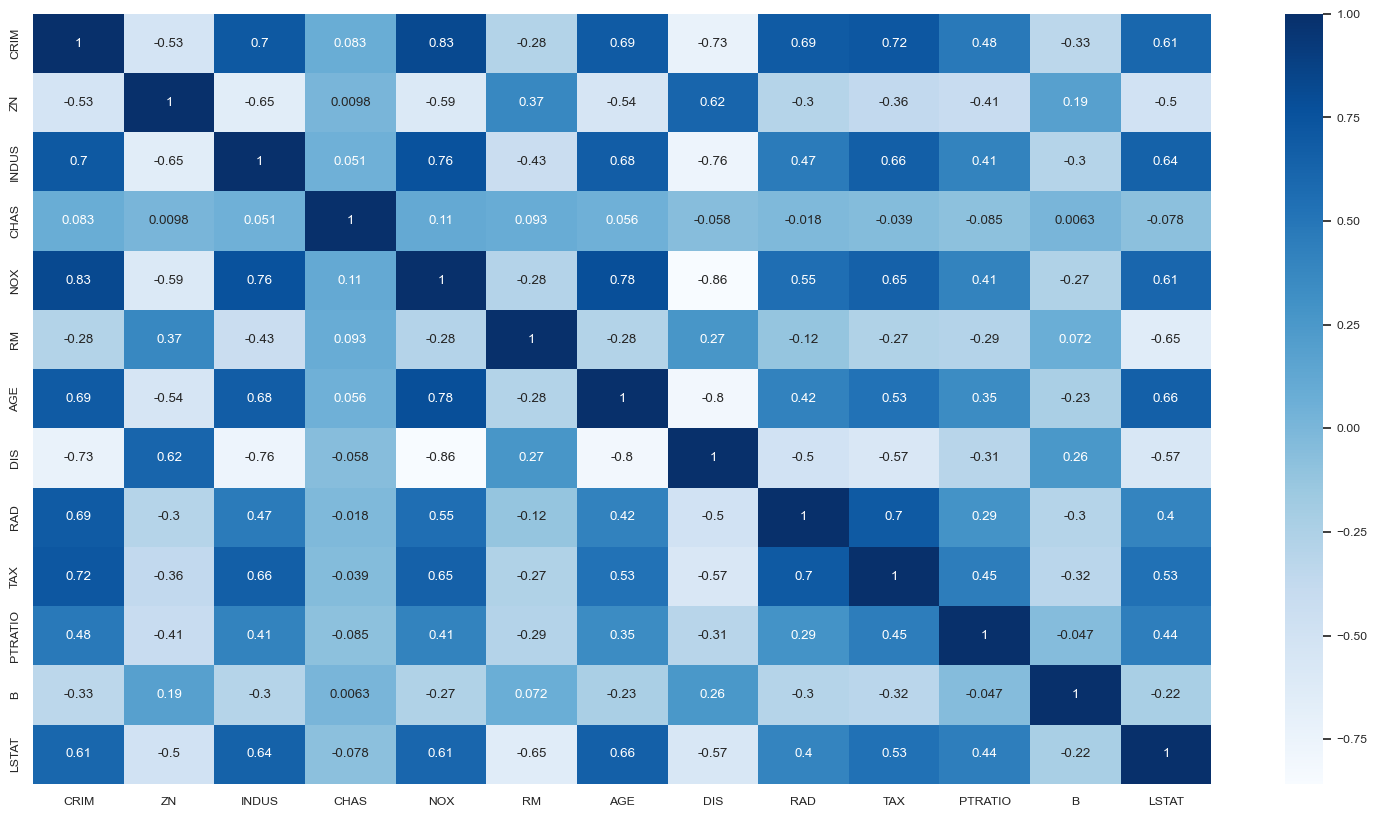

In [15]:
plt.figure(figsize=(19, 10))
sns.heatmap(df_boston.corr(method='spearman'), cmap='Blues',  annot=True)

In [16]:
df_boston.cov()

CRIM           ZN       INDUS      CHAS        NOX         RM  \
CRIM     105.797482    -6.160297   19.704576  0.185826   0.763212  -0.839528   
ZN        -6.160297   574.807173  -89.011145  0.068805  -1.023695   5.567390   
INDUS     19.704576   -89.011145   47.213337  0.069960   0.558401  -1.933243   
CHAS       0.185826     0.068805    0.069960  0.066915   0.005951   0.020659   
NOX        0.763212    -1.023695    0.558401  0.005951   0.017047  -0.019308   
RM        -0.839528     5.567390   -1.933243  0.020659  -0.019308   0.496779   
AGE       83.404956  -372.347519  123.703614  0.601114   2.352956  -4.734062   
DIS       -6.325174    32.891458  -10.210678 -0.047911  -0.180866   0.308611   
RAD       42.524807   -66.970156   35.771076 -0.053646   0.569726  -1.331731   
TAX      812.935607 -1253.033957  830.006256 -1.750654  12.673372 -34.681967   
PTRATIO   37.793953    14.165047    1.542494  0.241105   0.394419  -0.060761   
B       -246.571039   426.441485 -228.584828  1.628821  -3.416701   8.934169   
LSTAT     24.211644   -71.944941   29.797643 -0.130734   0.447035  -3.107674   

                 AGE         DIS          RAD           TAX     PTRATIO  \
CRIM       83.404956   -6.325174    42.524807    812.935607   37.793953   
ZN       -372.347519   32.891458   -66.970156  -1253.033957   14.165047   
INDUS     123.703614  -10.210678    35.771076    830.006256    1.542494   
CHAS        0.601114   -0.047911    -0.053646     -1.750654    0.241105   
NOX         2.352956   -0.180866     0.569726     12.673372    0.394419   
RM         -4.734062    0.308611    -1.331731    -34.681967   -0.060761   
AGE       786.186176  -44.001393   111.054773   2384.844465   14.480641   
DIS       -44.001393    4.406882    -9.057730   -188.561865   -0.553253   
RAD       111.054773   -9.057730    75.703403   1328.341876    4.731611   
TAX      2384.844465 -188.561865  1328.341876  28201.216996  141.549983   
PTRATIO    14.480641   -0.553253     4.731611    141.549983   37.131993   
B        -699.608900   56.420649  -357.023831  -6786.136823   18.724260   
LSTAT     120.272091   -7.469194    30.580639    652.339896    2.177784   

                   B       LSTAT  
CRIM     -246.571039   24.211644  
ZN        426.441485  -71.944941  
INDUS    -228.584828   29.797643  
CHAS        1.628821   -0.130734  
NOX        -3.416701    0.447035  
RM          8.934169   -3.107674  
AGE      -699.608900  120.272091  
DIS        56.420649   -7.469194  
RAD      -357.023831   30.580639  
TAX     -6786.136823  652.339896  
PTRATIO    18.724260    2.177784  
B        8357.398950 -242.655605  
LSTAT    -242.655605   50.984080

<AxesSubplot:>

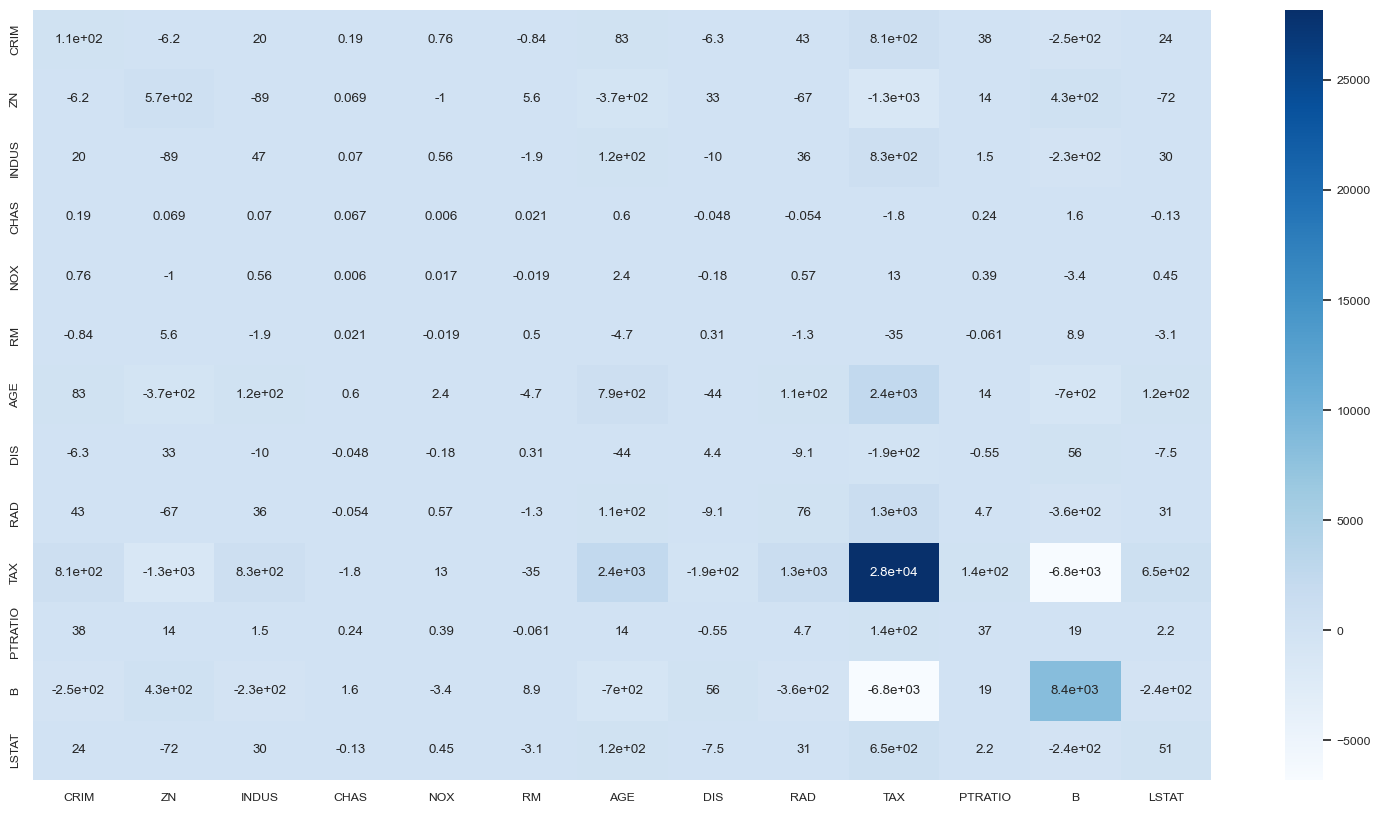

In [17]:
plt.figure(figsize=(19, 10))
sns.heatmap(df_boston.cov(), cmap='Blues', annot=True)

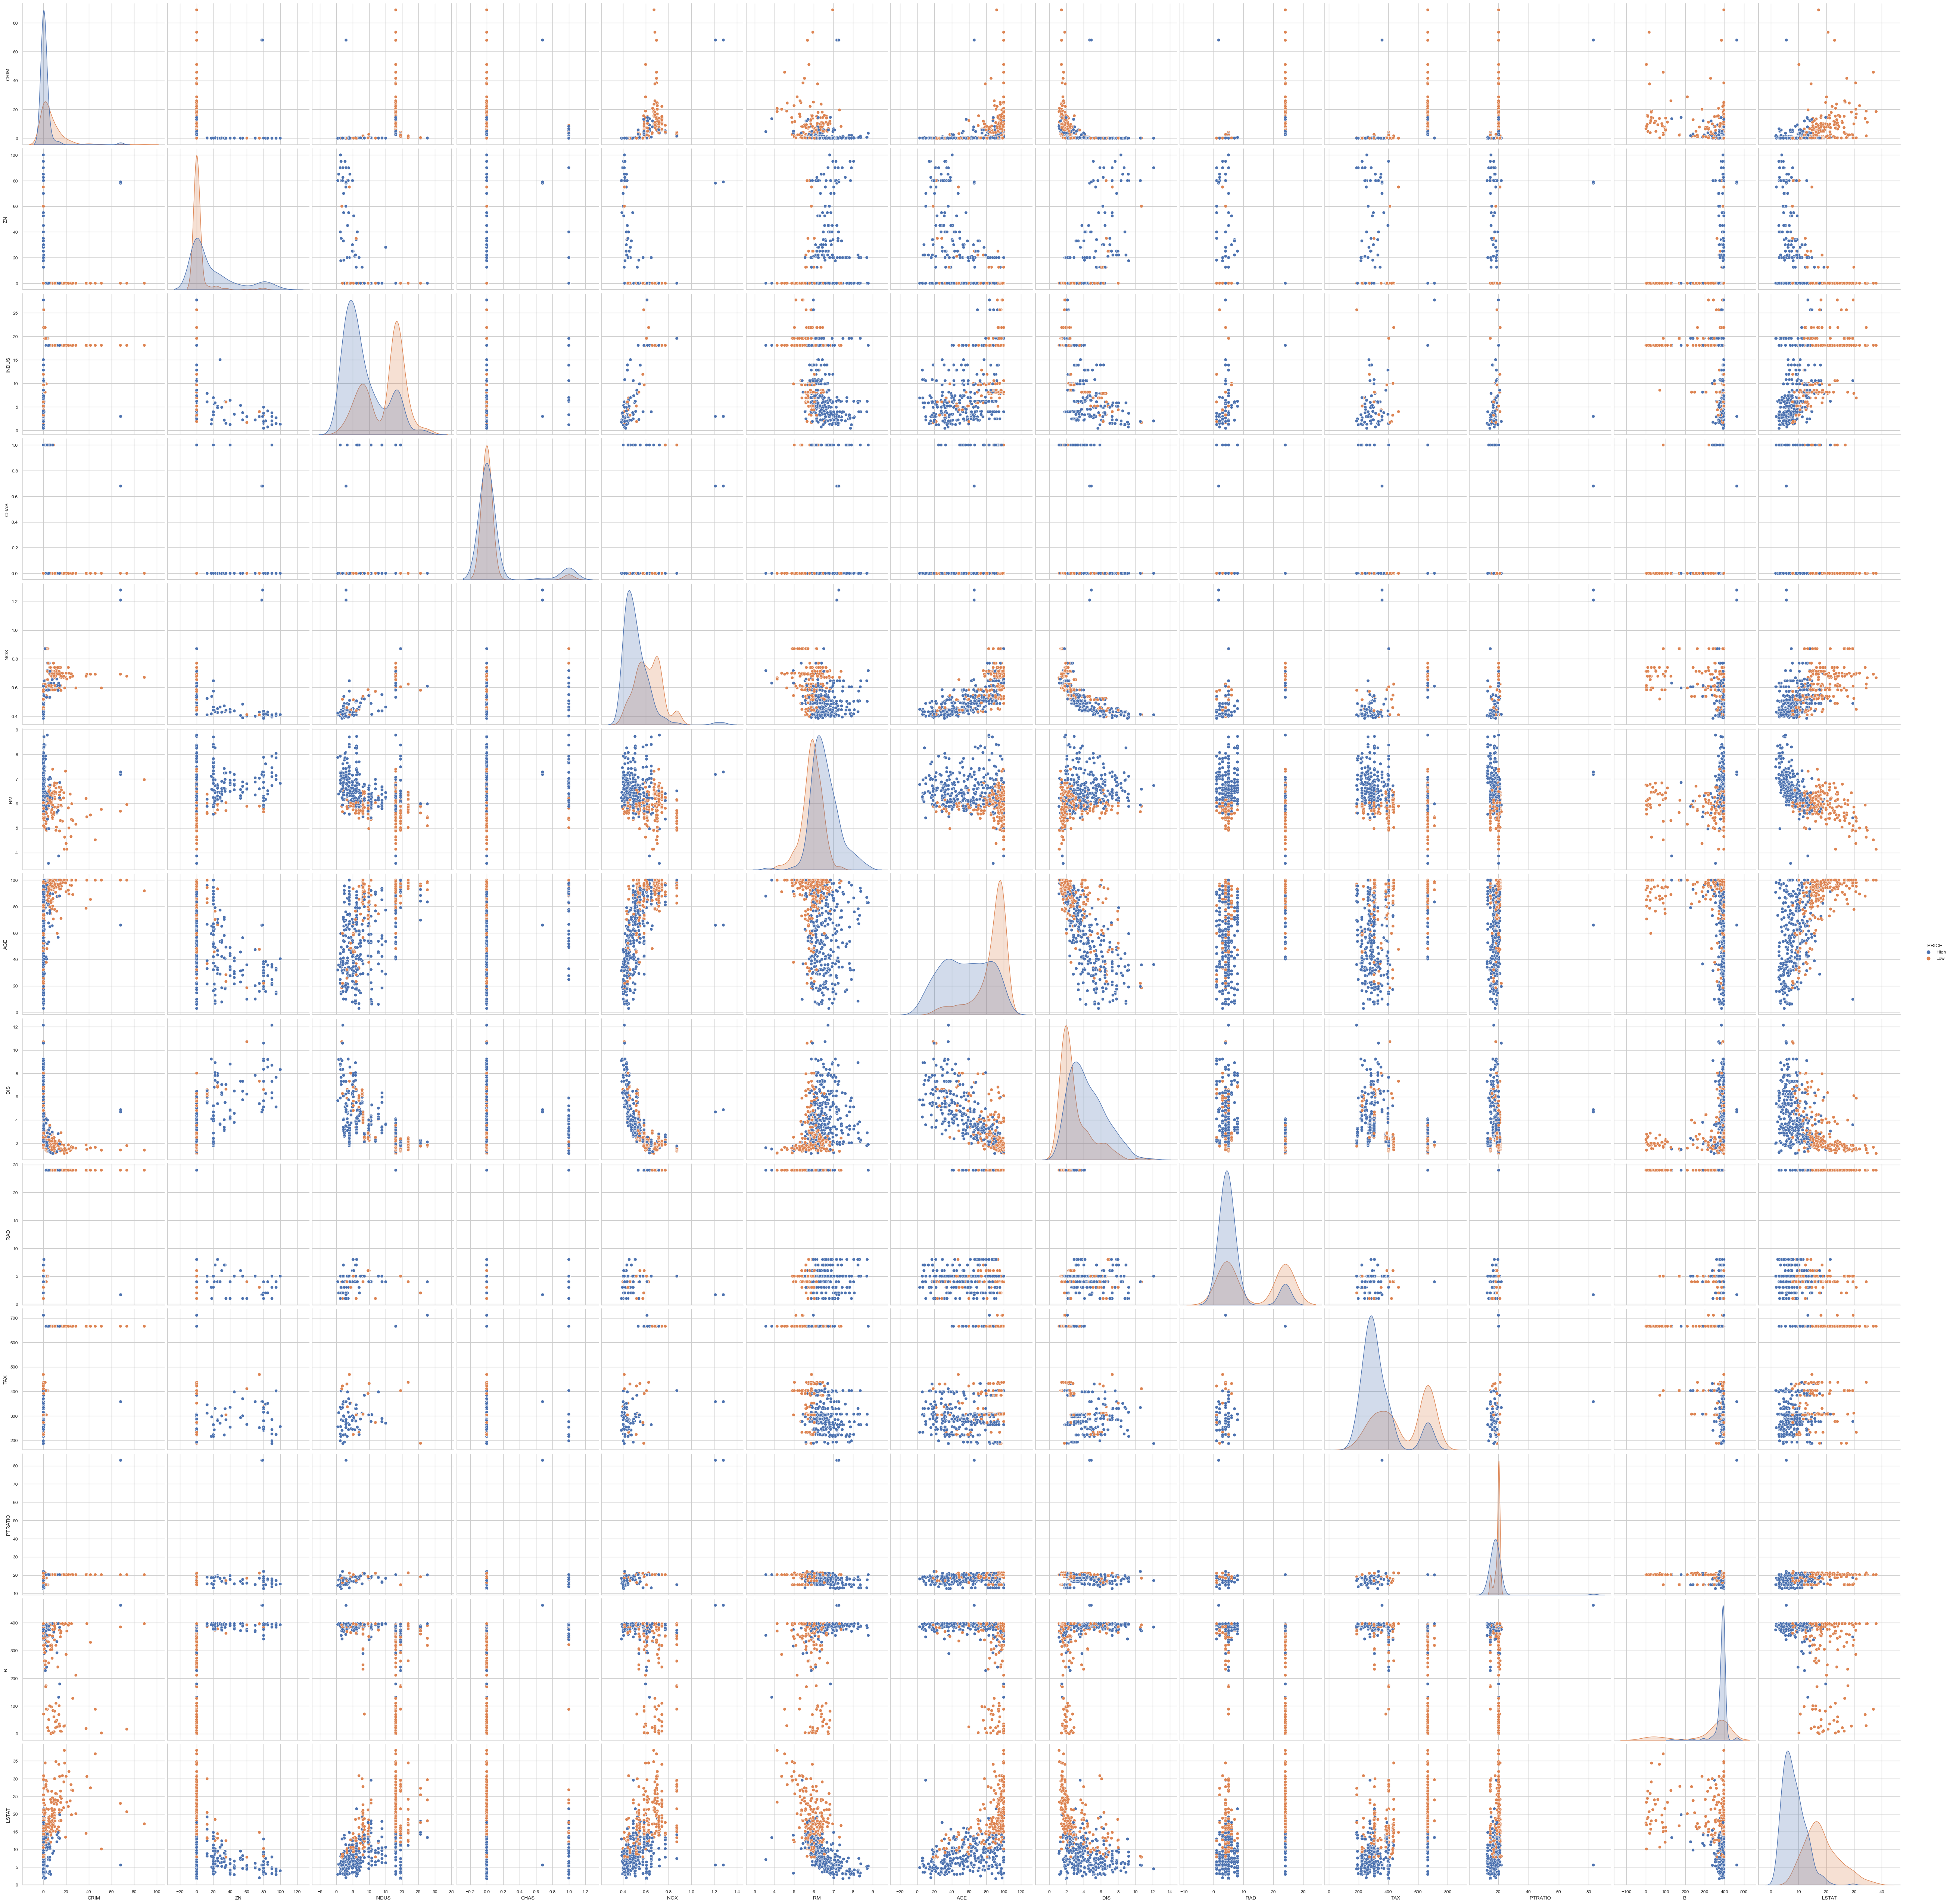

In [19]:
# Showing the Pairplot
sns.set_style('whitegrid');
### sns.pairplot(df_boston, vars = df_boston.columns[4:8] , hue = "PRICE", height = 4)
sns.pairplot(df_boston, hue = 'PRICE', height = 4)
plt.show()

In [18]:
X = df_boston.drop('PRICE',axis='columns') ### X includes var ['age','operation_year','axil_nodes' ]
y = df_boston['PRICE']

In [19]:
df_boston['PRICE'] = df_boston['PRICE'].map({'Low':1, 'High':2})

In [20]:
df_boston

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31  0.00  0.538  6.575  65.20  4.0900  1.00  296.0   
1     0.02731   0.0   7.07  0.00  0.469  6.421  78.90  4.9671  2.00  242.0   
2     0.02729   0.0   7.07  0.00  0.469  7.185  61.10  4.9671  2.00  242.0   
3     0.03237   0.0   2.18  0.00  0.458  6.998  45.80  6.0622  3.00  222.0   
4     0.06905   0.0   2.18  0.00  0.458  7.147  54.20  6.0622  3.00  222.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
505   0.04741   0.0  11.93  0.00  0.573  6.030  80.80  2.5050  1.00  273.0   
506  68.06900  78.0   2.98  0.68  1.210  7.180  65.88  4.6900  1.68  358.0   
507  68.06900  79.0   2.98  0.68  1.280  7.280  65.98  4.8800  1.68  358.0   
508  68.06900  78.0   2.98  0.68  1.210  7.180  65.88  4.6900  1.68  358.0   
509  68.06900  79.0   2.98  0.68  1.280  7.280  65.98  4.8800  1.68  358.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98      2  
1       17.8  396.90   9.14      2  
2       17.8  392.83   4.03      2  
3       18.7  394.63   2.94      2  
4       18.7  396.90   5.33      2  
..       ...     ...    ...    ...  
505     21.0  396.90   7.88      1  
506     83.0  463.00   5.58      2  
507     83.0  463.00   5.58      2  
508     83.0  463.00   5.58      2  
509     83.0  463.00   5.58      2  

[510 rows x 14 columns]

In [21]:
# 70% training and 30% test random state = ID
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20229068) 

In [22]:
#Standard_scaler = preprocessing.StandardScaler()
#X_train_scaled = Standard_scaler.fit_transform(X_train)
#X_test_scaled = Standard_scaler.fit_transform(X_test)
#X_train_scaled,X_test_scaled

In [23]:
############################### Logistic Regression ###########################
logmodel = LogisticRegression(solver='saga')
logmodel.fit(X_train, y_train)
y_pred=logmodel.predict(X_test)

## Calculate the fpr and tpr for all thresholds of the classification
probs = logmodel.predict_proba(X_test)
predLR = probs[:,1]
predLR


print('############# Logistic Reg ###############')
print(classification_report(y_test, y_pred)) # Logistic Regression
print('Confusion Matrix ', confusion_matrix(y_test, y_pred, labels=['High', 'Low']), sep = "\n")
print('Accuracy - ', accuracy_score(y_test, y_pred))

############# Logistic Reg ###############
              precision    recall  f1-score   support

        High       0.82      0.85      0.84        88
         Low       0.79      0.75      0.77        65

    accuracy                           0.81       153
   macro avg       0.81      0.80      0.80       153
weighted avg       0.81      0.81      0.81       153

Confusion Matrix 
[[75 13]
 [16 49]]
Accuracy -  0.8104575163398693


In [190]:
# Confution Matrix's Elements for Logistic Regression
cf_lr = confusion_matrix(y_test, y_pred)
TP = cf_lr[1,1] # true positive 
TN = cf_lr[0,0] # true negatives
FP = cf_lr[0,1] # false positives
FN = cf_lr[1,0] # false negatives

In [191]:
# Let's see the Predict Value Positive of our logistic regression model
pval_pos = TP / float(TP+FP)
pval_pos

0.7903225806451613

In [192]:
# Let's see the Predict Value Negative of our logistic regression model
pval_neg = TN / float(TN+FN)
pval_neg

0.8241758241758241

In [193]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.7538461538461538

In [194]:
# Let us calculate specificity of our logistic regression model
specificity = TN / float(TN+FP)
specificity

0.8522727272727273

In [195]:
################# DT #########################
DTclf=tree.DecisionTreeClassifier()
DTclf.fit(X_train, y_train)
y_pred= DTclf.predict(X_test) ##y_test

## Predict probabilities for the test data.
probsDT = DTclf.predict_proba(X_test)
## Keep Probabilities of the positive class only.
probsDT = probsDT[:, 1]
probsDT 

print('############# DT ###############')
print(classification_report(y_test, y_pred)) # DT
print('Confusion Matrix ', confusion_matrix(y_test, y_pred, labels=['High', 'Low']), sep = "\n")
print('Accuracy - ', accuracy_score(y_test, y_pred))

############# DT ###############
              precision    recall  f1-score   support

        High       0.84      0.83      0.83        88
         Low       0.77      0.78      0.78        65

    accuracy                           0.81       153
   macro avg       0.81      0.81      0.81       153
weighted avg       0.81      0.81      0.81       153

Confusion Matrix 
[[73 15]
 [14 51]]
Accuracy -  0.8104575163398693


In [196]:
# Confution Matrix's Elements for DT
cf_dt = confusion_matrix(y_test, y_pred)
TP = cf_dt[1,1] # true positive 
TN = cf_dt[0,0] # true negatives
FP = cf_dt[0,1] # false positives
FN = cf_dt[1,0] # false negatives

In [197]:
# Let's see the Predict Value Positive of our Decistion Tree model
pval_pos = TP / float(TP+FP)
pval_pos

0.7727272727272727

In [198]:
# Let's see the Predict Value Negative of our Decistion Tree model
pval_neg = TN / float(TN+FN)
pval_neg

0.8390804597701149

In [199]:
# Let's see the sensitivity of our Decistion Tree model
sensitivity = TP / float(TP+FN)
sensitivity

0.7846153846153846

In [200]:
# Let us calculate specificity of our Decistion Tree model
specificity = TN / float(TN+FP)
specificity

0.8295454545454546

In [130]:
rfc=RandomForestClassifier()
params = { 'criterion' : ['gini', 'entropy'],
          'n_estimators':[20,30,40,50] # number of trees in the forest
         }
y_train_ = y_train.map({'Low': 1, 'High': 0}).astype(int)

grid_model = GridSearchCV(rfc, param_grid=params, verbose=2)
grid_model.fit(X_train,y_train_)
grid_model.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ....................criterion=gini, n_estimators=20; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=20; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=20; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=20; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=20; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=30; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=30; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=30; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=30; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=30; total time=   0.0s
[CV] END ....................criterion=gini, n_estimators=40; total time=   0.0s
[CV] END ....................criterion=gini, n_es

{'criterion': 'entropy', 'n_estimators': 40}

In [202]:
################### RF ############################################
RFclf=RandomForestClassifier(criterion = 'entropy', n_estimators=40)
RFclf.fit(X_train, y_train)
y_pred=RFclf.predict(X_test)

##  Predict probabilities for the test data.
probsRF = RFclf.predict_proba(X_test)
## Keep Probabilities of the positive class only.
probsRF = probsRF[:, 1]
probsRF 

print('################################# RF #####################################')
print(classification_report(y_test, y_pred)) # RF
print('Confusion Matrix ', confusion_matrix(y_test, y_pred, labels=['High', 'Low']), sep = "\n")
print('Accuracy - ', accuracy_score(y_test, y_pred))

################################# RF #####################################
              precision    recall  f1-score   support

        High       0.88      0.93      0.91        88
         Low       0.90      0.83      0.86        65

    accuracy                           0.89       153
   macro avg       0.89      0.88      0.89       153
weighted avg       0.89      0.89      0.89       153

Confusion Matrix 
[[82  6]
 [11 54]]
Accuracy -  0.8888888888888888


In [203]:
# Confution Matrix's Elements Elements for RF
cf_rf = confusion_matrix(y_test, y_pred)
TP = cf_rf[1,1] # true positive 
TN = cf_rf[0,0] # true negatives
FP = cf_rf[0,1] # false positives
FN = cf_rf[1,0] # false negatives

In [204]:
# Let's see the Predict Value Positive of our Random Forest model
pval_pos = TP / float(TP+FP)
pval_pos

0.9

In [205]:
# Let's see the Predict Value Negative of our Random Forest model
pval_neg = TN / float(TN+FN)
pval_neg

0.8817204301075269

In [206]:
# Let's see the sensitivity of our Random Forest model
sensitivity = TP / float(TP+FN)
sensitivity

0.8307692307692308

In [207]:
# Let us calculate specificity of our Random Forest model
specificity = TN / float(TN+FP)
specificity

0.9318181818181818

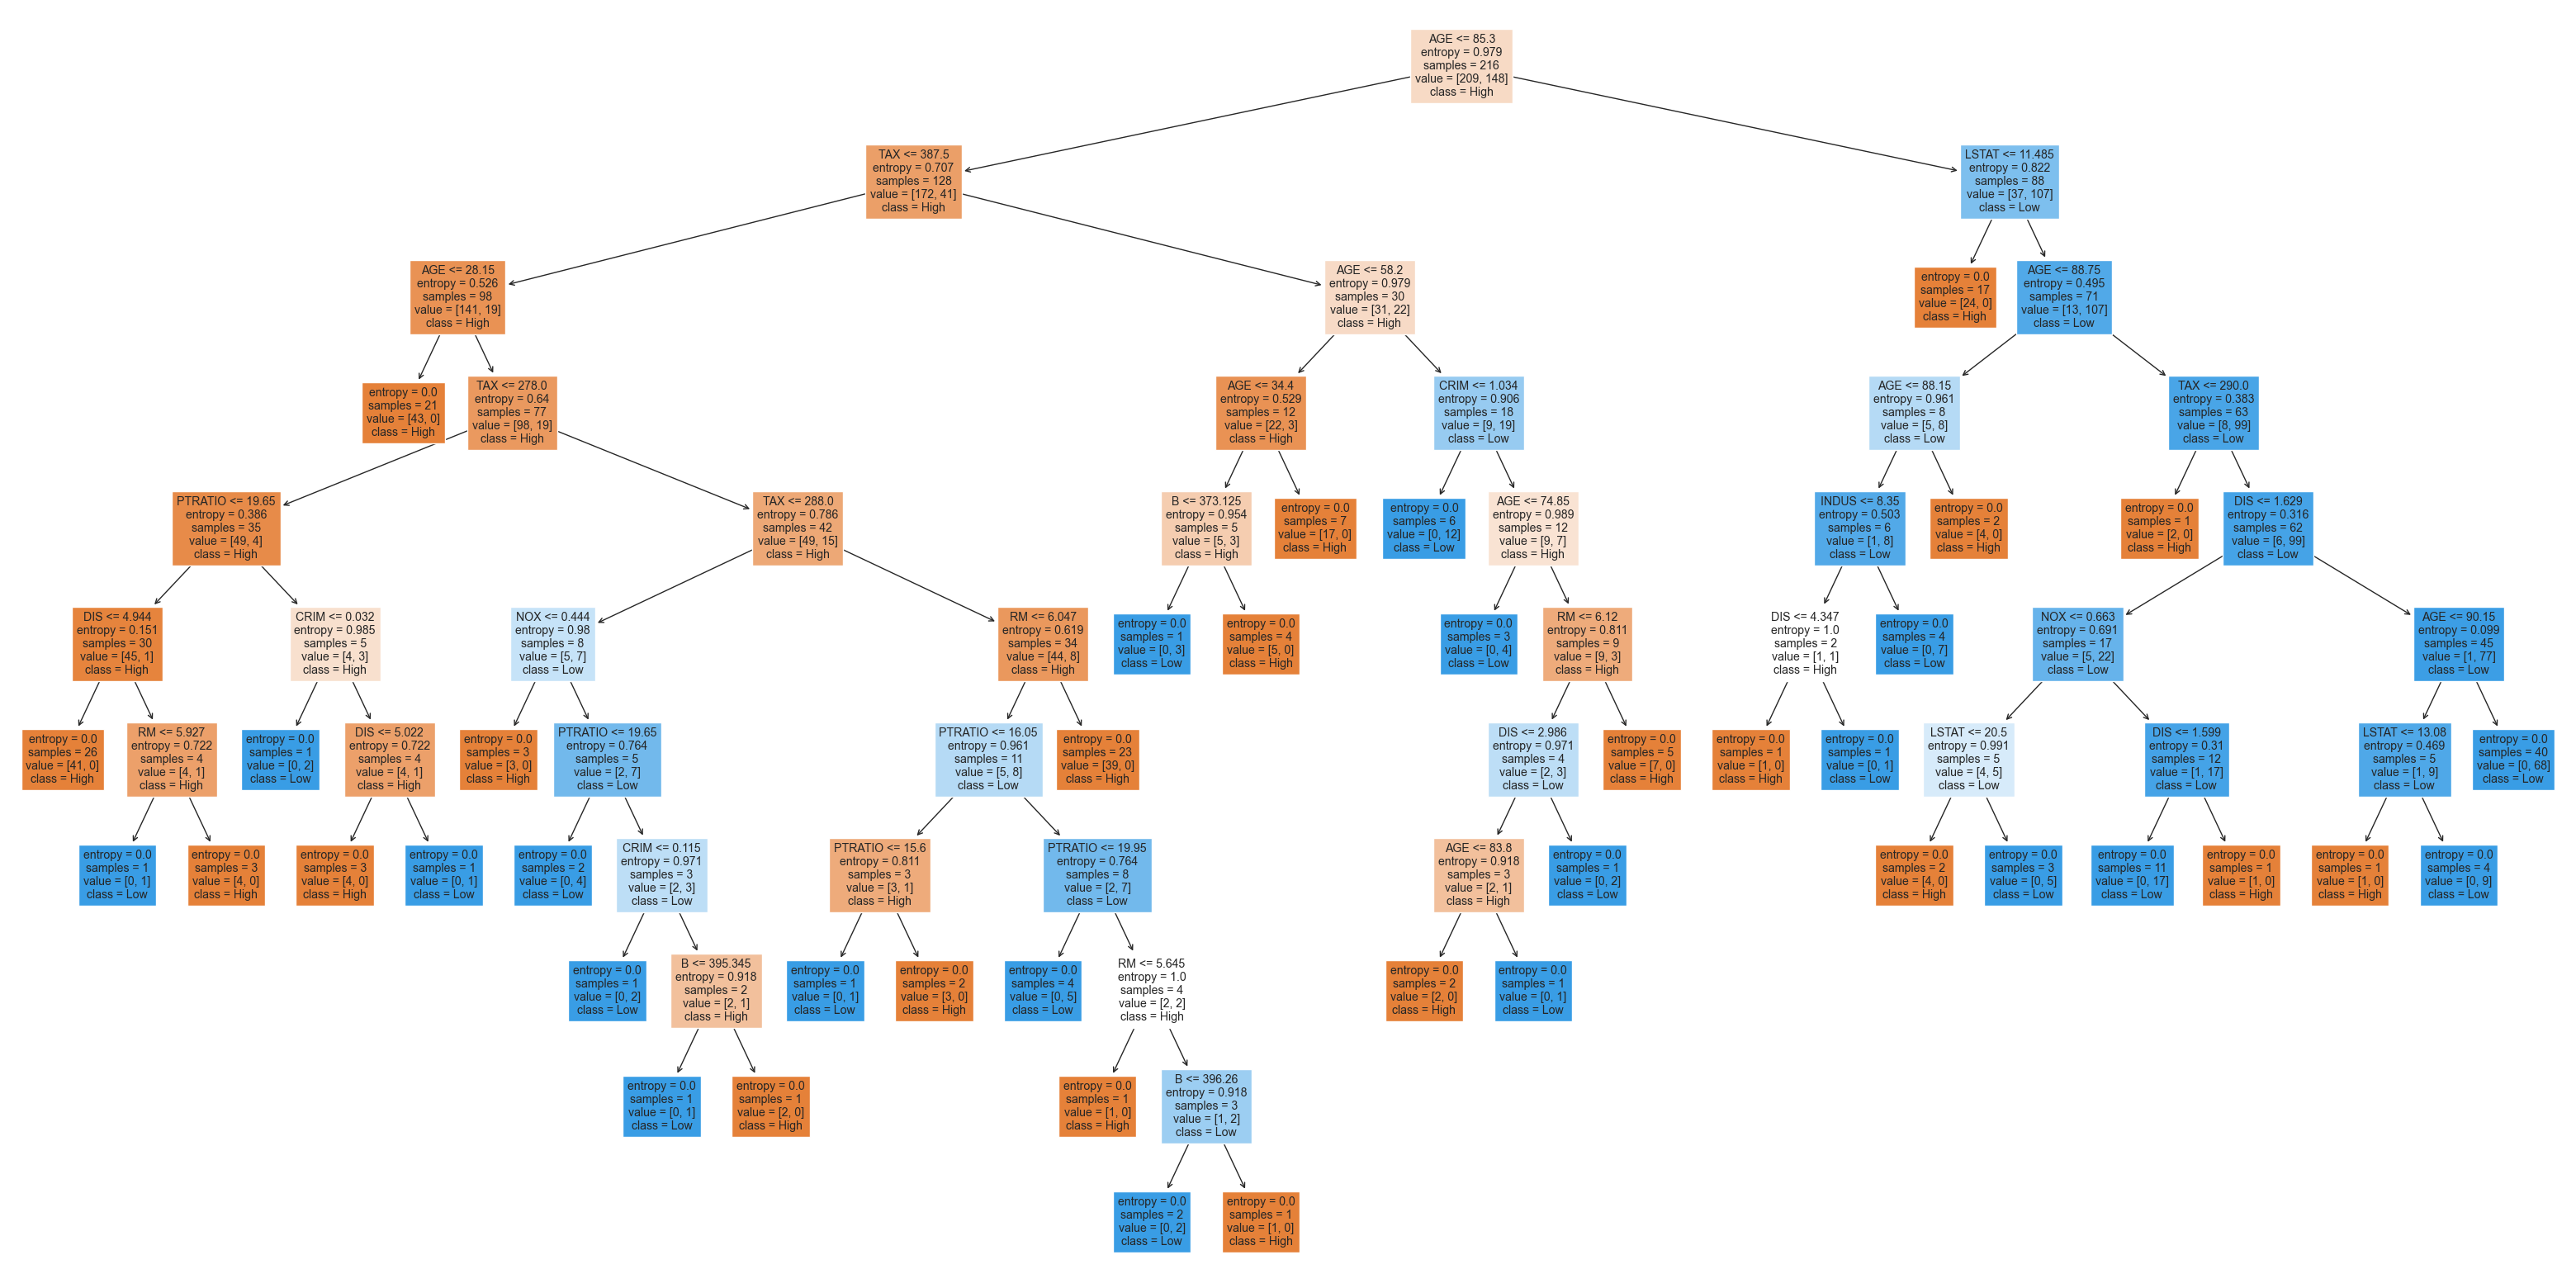

In [208]:
plt.figure(figsize=(40,20))
tree.plot_tree(RFclf.estimators_[0],filled=True,class_names=['High','Low'],feature_names=X.columns)
plt.show()

In [209]:
SVclf = SVC(kernel='linear', degree=3, probability=True) 
SVclf.fit(X_train, y_train)
y_pred=SVclf.predict(X_test)

##### Predict probabilities for the test data.
probsSV = SVclf.fit(X_train, y_train).decision_function(X_test)
probsSV

print('########################## SVM #################################')
print(classification_report(y_test, y_pred)) # SVM
print('Confusion Matrix ', confusion_matrix(y_test, y_pred, labels=['High', 'Low']), sep = "\n")
print('Accuracy - ', accuracy_score(y_test, y_pred))

########################## SVM #################################
              precision    recall  f1-score   support

        High       0.90      0.89      0.89        88
         Low       0.85      0.86      0.85        65

    accuracy                           0.88       153
   macro avg       0.87      0.87      0.87       153
weighted avg       0.88      0.88      0.88       153

Confusion Matrix 
[[78 10]
 [ 9 56]]
Accuracy -  0.8758169934640523


In [210]:
# Confution Matrix's Elements Elements for SVM
cf_svm = confusion_matrix(y_test, y_pred)
TP = cf_svm[1,1] # true positive 
TN = cf_svm[0,0] # true negatives
FP = cf_svm[0,1] # false positives
FN = cf_svm[1,0] # false negatives

In [211]:
# Let's see the Predict Value Positive of our SVM model
pval_pos = TP / float(TP+FP)
pval_pos

0.8484848484848485

In [212]:
# Let's see the Predict Value Negative of our SVM model
pval_neg = TN / float(TN+FN)
pval_neg

0.896551724137931

In [213]:
# Let's see the sensitivity of our SVM model
sensitivity = TP / float(TP+FN)
sensitivity

0.8615384615384616

In [214]:
# Let us calculate specificity of our SVM model
specificity = TN / float(TN+FP)
specificity

0.8863636363636364

In [215]:
############################### Prediction ###########################
############## Predict from Test Dataset (for 4 datas) ###################
print('Prediction with Logistic :', logmodel.predict(X_test[1:5]))
print('Prediction with DT :', DTclf.predict(X_test[1:5]))
print('Prediction with RF :', RFclf.predict(X_test[1:5]))
print('Prediction with SVM :', SVclf.predict(X_test[1:5]))


Prediction with Logistic : ['High' 'High' 'High' 'Low']
Prediction with DT : ['High' 'High' 'High' 'Low']
Prediction with RF : ['High' 'High' 'High' 'Low']
Prediction with SVM : ['High' 'High' 'High' 'Low']


In [216]:
from sklearn.metrics import roc_curve, roc_auc_score
###Compute the AUC Score.
auc = roc_auc_score(y_test, probsDT)
auc2 = roc_auc_score(y_test, probsRF)
auc3 = roc_auc_score(y_test, probsSV)
auc4 = roc_auc_score(y_test, predLR)
print('DT AUC:', auc)
print('RF AUC2:', auc2)
print('SVM AUC3:', auc3)
print('LR AUC4:', auc4)

DT AUC: 0.8070804195804195
RF AUC2: 0.9481643356643356
SVM AUC3: 0.9263986013986014
LR AUC4: 0.8692307692307693


In [217]:
###Get the ROC Curve
y_test_ = y_test.map({'Low': 1, 'High': 0}).astype(int)
fpr, tpr, thresholds = roc_curve(y_test_, probsDT)
fpr2, tpr2, thresholds2 = roc_curve(y_test_, probsRF)
fpr3, tpr3, thresholds3 = roc_curve(y_test_, probsSV)
fpr4, tpr4, thresholds4 = roc_curve(y_test_, predLR)

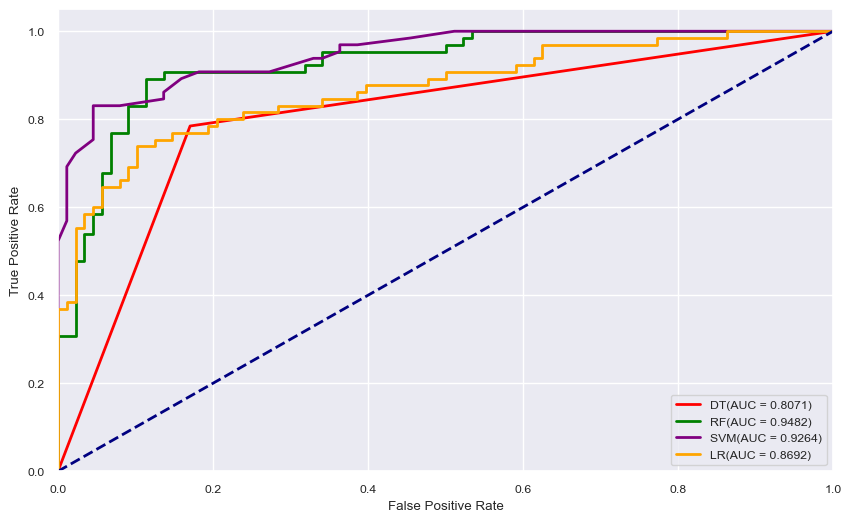

In [218]:
####Plot ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='DT(AUC = %0.4f)' % auc)
plt.plot(fpr3, tpr3, color='green',
         lw=lw, label='RF(AUC = %0.4f)' % auc2)
plt.plot(fpr2, tpr2, color='purple',
         lw=lw, label='SVM(AUC = %0.4f)' % auc3)
plt.plot(fpr4, tpr4, color='orange',
         lw=lw, label='LR(AUC = %0.4f)' % auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
##plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Question 3

In [24]:
# Random forest has the most accuracy score. That's why I have fitted the whole dataset in RandomForestClassifier
RFclf_w=RandomForestClassifier(criterion = 'entropy', n_estimators=40) 
RFclf_w.fit(X, y)

RandomForestClassifier(criterion='entropy', n_estimators=40)

In [25]:
# Prediction from the Whole Model from taking sample from test dataset
print('Prediction with RF:', RFclf_w.predict(X_test[1:5]))

Prediction with RF: ['High' 'High' 'High' 'Low']


Feature Importances: [0.07481777 0.00832891 0.0492804  0.00543873 0.0629844  0.13422879
 0.14229922 0.05120671 0.01117719 0.05725121 0.07188518 0.04826696
 0.28283453]


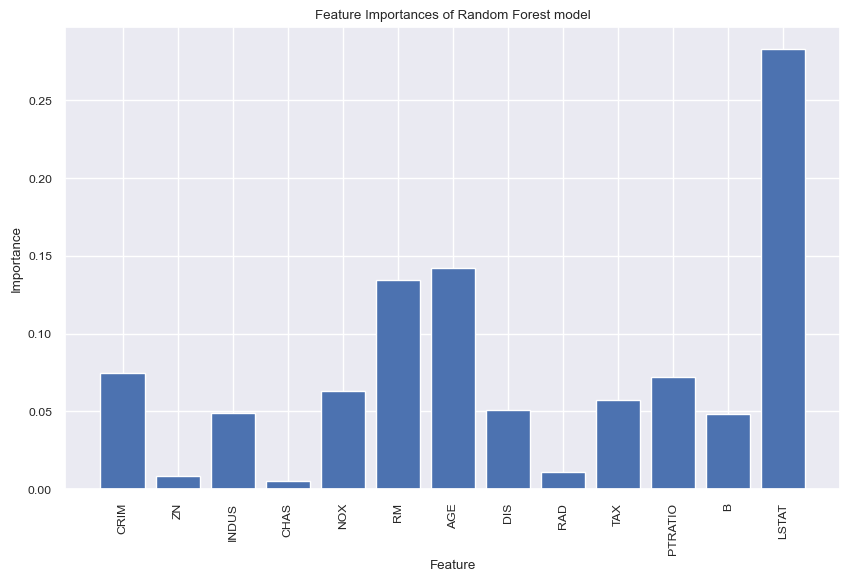

In [26]:
importances = RFclf_w.feature_importances_
print('Feature Importances:', importances)
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances of Random Forest model')
plt.show()

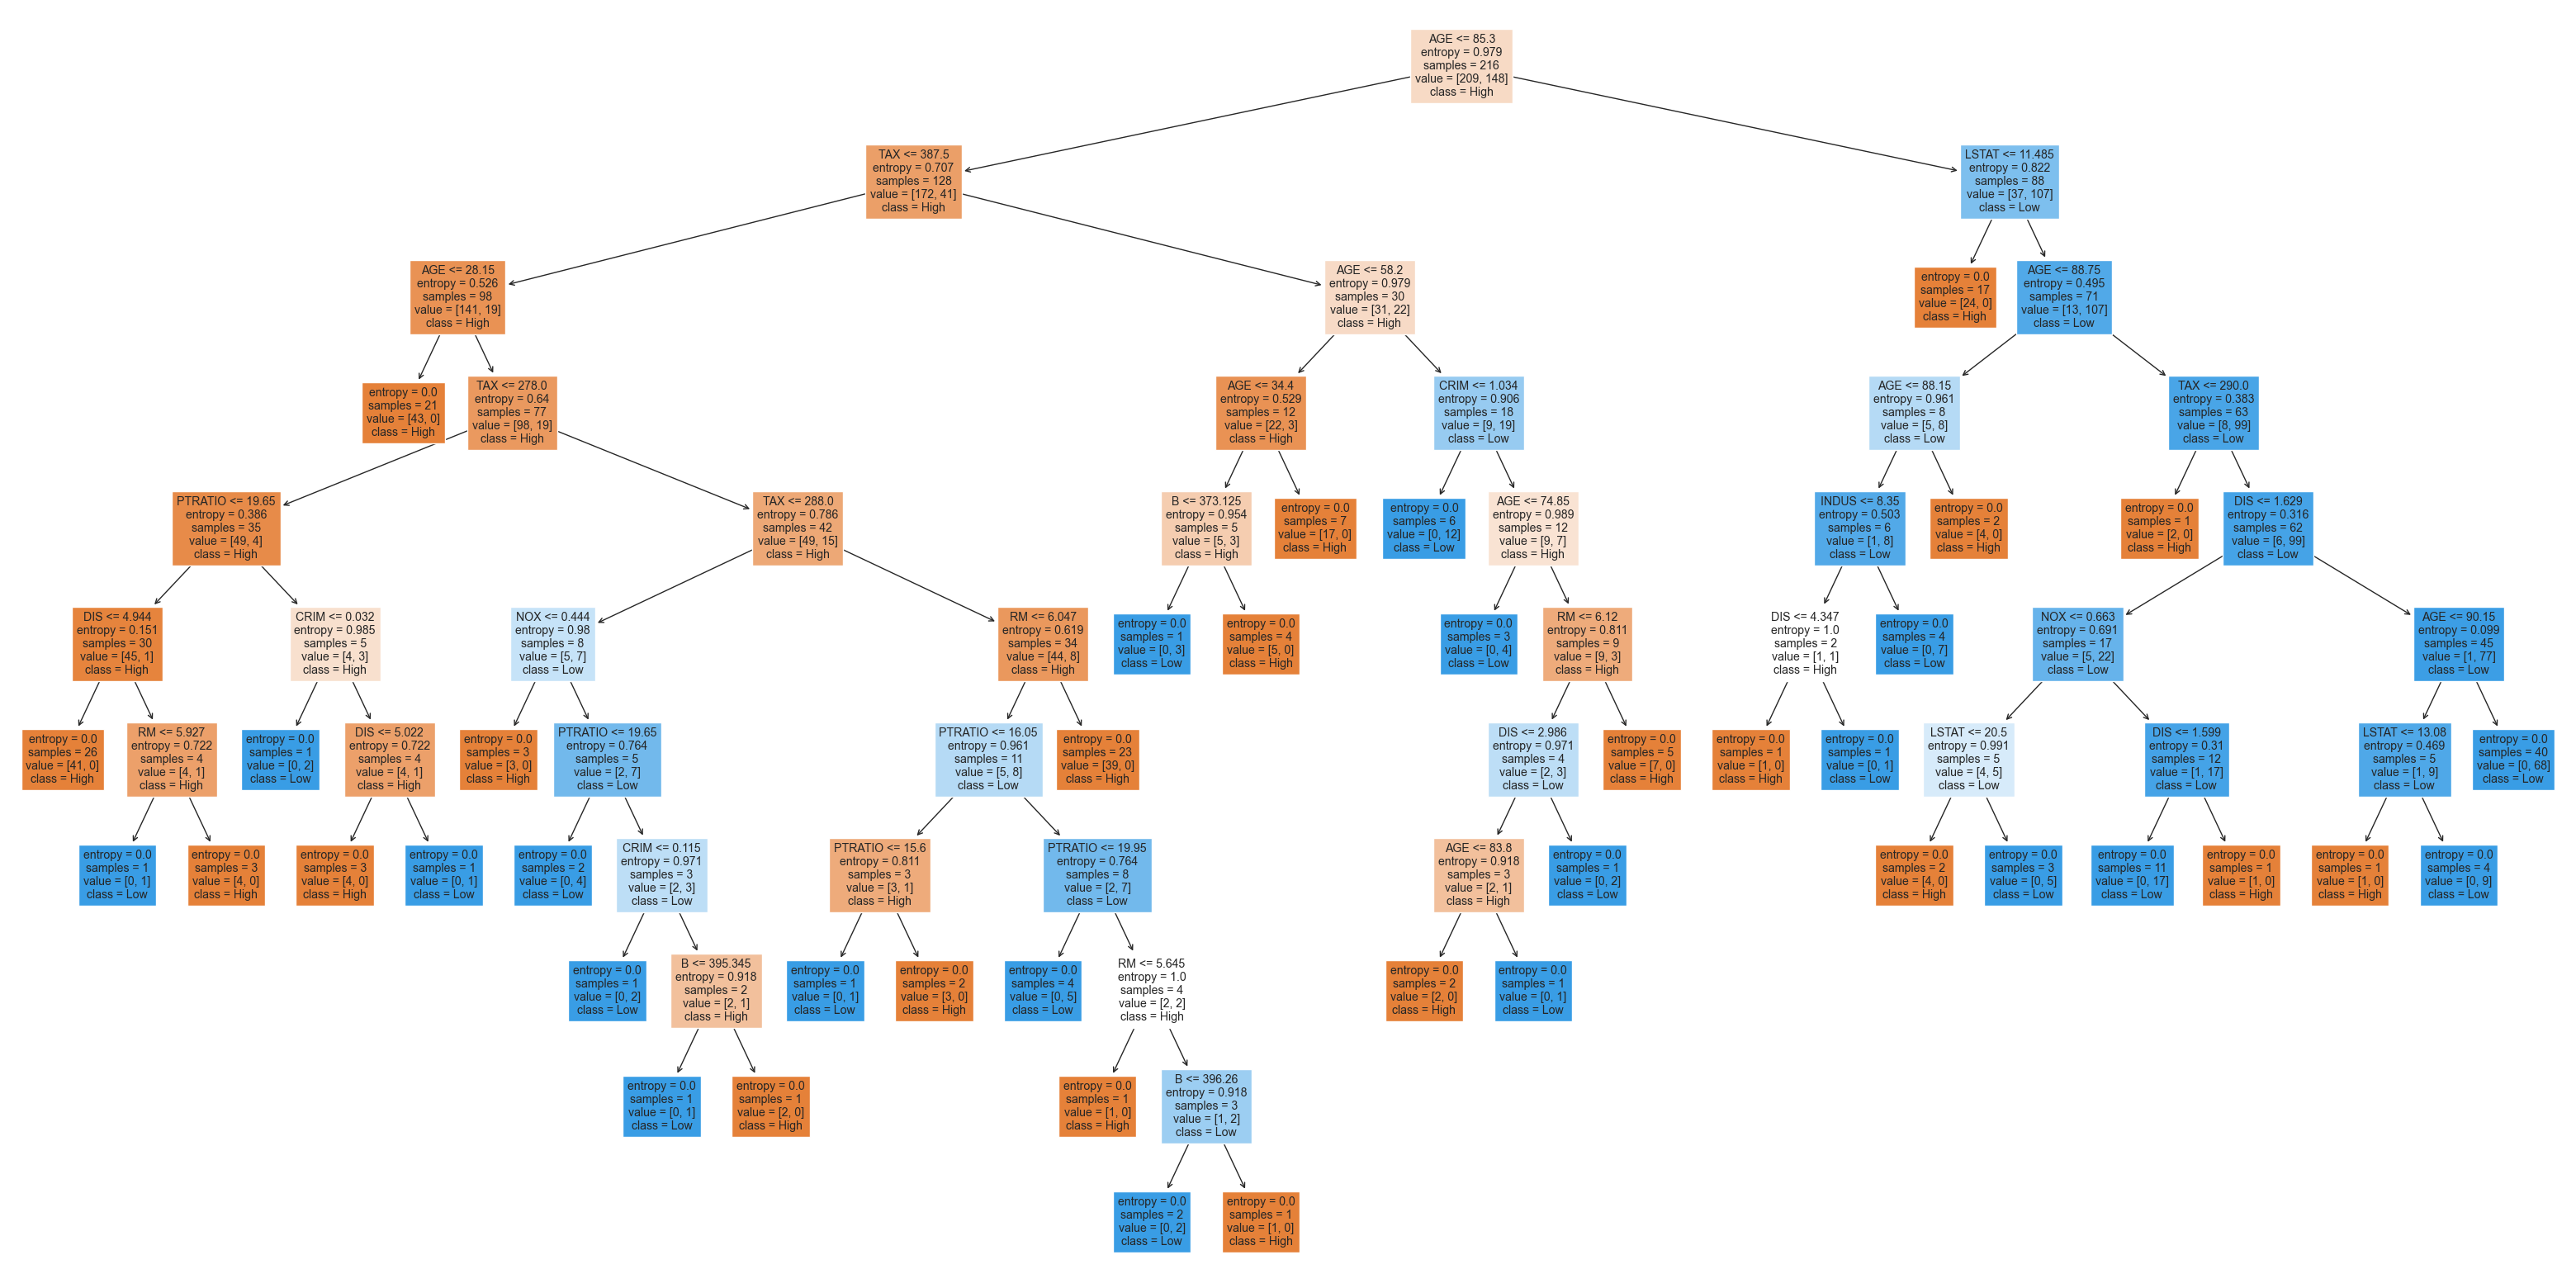

In [221]:
plt.figure(figsize=(40,20))
tree.plot_tree(RFclf.estimators_[0],filled=True,class_names=['High','Low'],feature_names=X.columns)
plt.show()